In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    confusion_matrix, 
    classification_report, 
    accuracy_score, 
    roc_auc_score, 
    roc_curve, 
    auc
)

In [271]:
df = pd.read_csv("Raisin_preprocessed.csv")

In [272]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.590559,81463.0,0.792772,1073.251,1


In [273]:
x = df.drop('Class', axis=1)
y = df['Class']

In [274]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [275]:
x_scaled_df = pd.DataFrame(
    x_scaled,
    columns=x.columns
)
x_scaled_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.018233,0.114718,-0.008905,0.433793,0.014334,1.182348,0.085566
1,-0.321083,-0.205127,-0.223887,0.209859,-0.299351,-0.340924,-0.154109
2,0.109720,0.114908,0.264303,0.166758,0.098939,-1.291766,0.180025
3,-1.123875,-1.285961,-0.942103,-1.248841,-1.138540,-0.024708,-1.222948
4,-0.204609,-0.695392,0.777711,-2.428005,-0.228007,1.879817,-0.340966


In [276]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled_df, y, test_size=0.2, random_state=42)

In [277]:
xtrain.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,-0.176356,0.179564,-0.448263,0.887128,-0.148044,-0.543162,0.055787
334,-0.394750,-0.855274,0.606989,-2.428005,-0.401912,0.109801,-0.422169
244,-0.030778,-0.441896,0.723825,-1.655140,-0.078888,1.253911,-0.258866
678,2.380226,1.724596,2.458959,0.084868,2.365533,0.659273,1.991428
306,-0.659657,-0.074881,-1.310724,1.324289,-0.683100,1.744358,-0.551551


In [278]:
ytrain.head()

10     1
334    1
244    1
678    0
306    1
Name: Class, dtype: int64

Applying in logistic regression

In [279]:
logi = LogisticRegression(max_iter=500)

In [280]:
param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 50],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

In [281]:
grid = GridSearchCV(
    estimator=logi,
    param_grid = param_grid,
    cv = 5,
    scoring = 'accuracy'
)

In [282]:
logistic_model = grid.fit(xtrain, ytrain)

In [283]:
print(f'Train score: {logistic_model.score(xtrain, ytrain)}')
print(f'Test score: {logistic_model.score(xtest, ytest)}')

Train score: 0.8694444444444445
Test score: 0.8666666666666667


In [284]:
logistic_pred = logistic_model.predict(xtest)

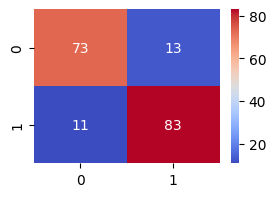

In [285]:
cm_log = confusion_matrix(ytest, logistic_pred)
plt.figure(figsize=(3,2))
sns.heatmap(cm_log, annot=True, cmap='coolwarm')
plt.show()

In [286]:
print(f'Classification report:\n{classification_report(ytest, logistic_pred)}')

Classification report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86        86
           1       0.86      0.88      0.87        94

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



In [287]:
print(f'Best Parameter: {logistic_model.best_params_}')
print(f'Best Score: {logistic_model.best_score_}')
print(f'Best Index: {logistic_model.best_index_}')

Best Parameter: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score: 0.8708333333333333
Best Index: 1


Applying in KNN

In [288]:
knn = KNeighborsClassifier()

In [289]:
param_grid_k = [
    {
        'n_neighbors': range(3, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1,2]
    },
    {
        'n_neighbors': range(3, 21, 2),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean','manhattan']
    }
]

In [290]:
grid_knn = GridSearchCV(
    estimator = knn, 
    param_grid = param_grid_k,
    cv = 5,
    scoring='accuracy'
)

In [291]:
knn_model = grid_knn.fit(xtrain ,ytrain)

In [292]:
print(f'Train Score: {knn_model.score(xtrain, ytrain)}')
print(f'Test Score: {knn_model.score(xtest, ytest)}')

Train Score: 0.8666666666666667
Test Score: 0.85


In [293]:
pred_knn = knn_model.predict(xtest)

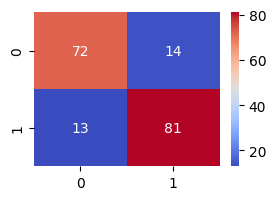

In [294]:
cm_knn = confusion_matrix(ytest, pred_knn)
plt.figure(figsize=(3,2))
sns.heatmap(cm_knn, annot=True, cmap='coolwarm')
plt.show()

In [295]:
print(f'Classification report:\n{classification_report(ytest, pred_knn)}')

Classification report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84        86
           1       0.85      0.86      0.86        94

    accuracy                           0.85       180
   macro avg       0.85      0.85      0.85       180
weighted avg       0.85      0.85      0.85       180



In [296]:
print(f'Best Parameter: {knn_model.best_params_}')
print(f'Best Score: {knn_model.best_score_}')
print(f'Best Index: {knn_model.best_index_}')

Best Parameter: {'metric': 'minkowski', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}
Best Score: 0.8722222222222223
Best Index: 28


In [297]:
y.value_counts()

Class
1    450
0    450
Name: count, dtype: int64

Applying Decision Tree

In [311]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [312]:
x_train.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
10,80437.000,449.454581,232.325506,0.856043,84460.0,0.674236,1176.305
334,72483.000,334.417609,282.680889,0.590559,74945.0,0.706180,1052.159
244,85739.000,380.370379,288.256159,0.652452,87052.0,0.762152,1094.576
678,173548.625,621.206763,371.054747,0.791796,178669.5,0.733061,1679.075
306,62835.000,421.169338,191.169862,0.891051,64406.0,0.786145,1018.553


In [313]:
y_train.head()

10     1
334    1
244    1
678    0
306    1
Name: Class, dtype: int64

In [314]:
dect = DecisionTreeClassifier(
    random_state=42
)

In [315]:
param_grid_d = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [None, 3, 5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'splitter': ['best', 'random'],
    'ccp_alpha': [0.0, 0.001, 0.01, 1]
}

In [316]:
grid_dect = GridSearchCV(
    estimator = dect,
    param_grid = param_grid_d,
    n_jobs=-1, 
    cv= 5, 
    scoring='accuracy',
    verbose=1
)

In [317]:
decision_model = grid_dect.fit(x_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


In [318]:
print(f'Train Score: {decision_model.score(x_train, y_train)}')
print(f'Test Score: {decision_model.score(x_test, y_test)}')

Train Score: 0.8666666666666667
Test Score: 0.8555555555555555


In [319]:
pred_dect = decision_model.predict(x_test)

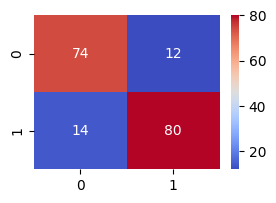

In [320]:
cm_dect = confusion_matrix(y_test, pred_dect)
plt.figure(figsize=(3,2))
sns.heatmap(cm_dect, annot=True, cmap='coolwarm')
plt.show()

In [321]:
print(f'Classification report:\n{classification_report(y_test, pred_dect)}')

Classification report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        86
           1       0.87      0.85      0.86        94

    accuracy                           0.86       180
   macro avg       0.86      0.86      0.86       180
weighted avg       0.86      0.86      0.86       180



In [322]:
print(f'Best Parameter: {decision_model.best_params_}')
print(f'Best Score: {decision_model.best_score_}')
print(f'Best Index: {decision_model.best_index_}')

Best Parameter: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'splitter': 'random'}
Best Score: 0.8666666666666668
Best Index: 505


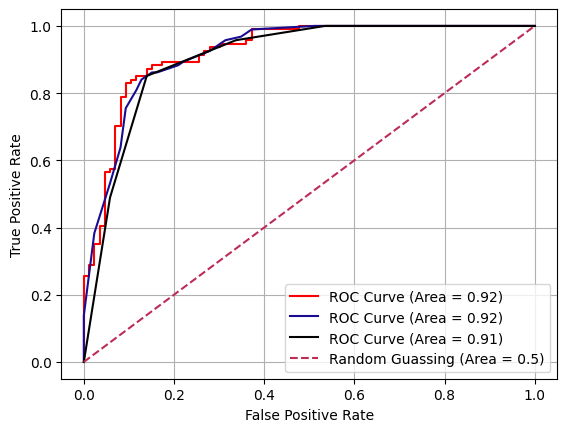

In [328]:
logistic_pred_proba = logistic_model.predict_proba(xtest)[:, 1]
fpr1, tpr1, _ = roc_curve(ytest, logistic_pred_proba)
roc_auc1 = roc_auc_score(ytest, logistic_pred_proba)

knn_pred_proba = knn_model.predict_proba(xtest)[:, 1]
fpr2, tpr2, _ = roc_curve(ytest, knn_pred_proba)
roc_auc2 = roc_auc_score(ytest, knn_pred_proba)

decision_pred_proba = decision_model.predict_proba(x_test)[:, 1]
fpr3, tpr3, _ = roc_curve(y_test, decision_pred_proba)
roc_auc3 = roc_auc_score(y_test, decision_pred_proba)

plt.plot(fpr1, tpr1, color='red', label=f'ROC Curve (Area = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color="#1A0C92", label=f'ROC Curve (Area = {roc_auc2:.2f})')
plt.plot(fpr3, tpr3, color="#010002", label=f'ROC Curve (Area = {roc_auc3:.2f})')

plt.plot([0,1], [0,1], color="#BD2C57", linestyle="--", label='Random Guassing (Area = 0.5)')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()